In [2]:
import os
import pandas as pd

from model.standard import std_eda
from model import pylint_model

In [2]:
CSV_PATH = os.getcwd()
CSV_NAME = r'\pylint.csv'

In [3]:
pd.set_option('display.max_columns', 100,
              'display.max_colwidth', 1000,
              'display.max_rows',100)

# I. Preparation

In [4]:
df = pd.read_csv(CSV_PATH + CSV_NAME, sep=';')
df = pylint_model.clean_df(df)
df = pylint_model.get_message_level(df)
df = pylint_model.get_clean_messages(df)
df = pylint_model.get_category(df)
df = pylint_model.get_clean_message(df)

# II. Visualisation

In [5]:
Explorator = std_eda.EdaExplorator(df)
Displayer = Explorator.displayer

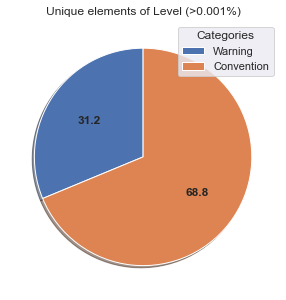

In [6]:
Displayer.plot_feature('Level')

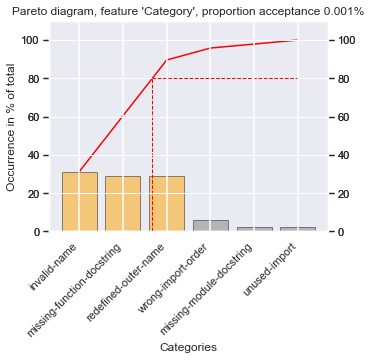

In [7]:
Displayer.plot_feature('Category')

# III. Cleaning

## A. Errors

In [8]:
df[df['Level']=='Error'].sort_values('Line', ascending=True)

,Line,Message,Level,Category


## B. Warnings

In [9]:
df[df['Level']=='Warning'].sort_values('Line', ascending=True)

,Line,Message,Level,Category
44,3,Unused import os,Warning,unused-import
2,40,Redefining name spark from outer scope (line 223),Warning,redefined-outer-name
5,66,Redefining name spark from outer scope (line 223),Warning,redefined-outer-name
6,68,Redefining name df from outer scope (line 224),Warning,redefined-outer-name
11,79,Redefining name df from outer scope (line 224),Warning,redefined-outer-name
14,92,Redefining name df from outer scope (line 224),Warning,redefined-outer-name
17,98,Redefining name df from outer scope (line 224),Warning,redefined-outer-name
20,104,Redefining name df from outer scope (line 224),Warning,redefined-outer-name
23,110,Redefining name df from outer scope (line 224),Warning,redefined-outer-name
27,119,Redefining name df from outer scope (line 224),Warning,redefined-outer-name


## C. Refactor

In [10]:
df[df['Level']=='Refactor'].sort_values('Line', ascending=True)

,Line,Message,Level,Category


## D. Convention

In [12]:
categories = df[df['Level']=='Convention']['Category']
main_category = list(dict(categories.value_counts()).items())[0][0]
df[df['Category']==main_category].sort_values(by='Line')

,Line,Message,Level,Category
7,68,"Variable name ""df"" doesnt conform to snake_case naming style",Convention,invalid-name
8,74,"Variable name ""df"" doesnt conform to snake_case naming style",Convention,invalid-name
9,79,"Argument name ""df"" doesnt conform to snake_case naming style",Convention,invalid-name
12,92,"Argument name ""df"" doesnt conform to snake_case naming style",Convention,invalid-name
15,98,"Argument name ""df"" doesnt conform to snake_case naming style",Convention,invalid-name
18,104,"Argument name ""df"" doesnt conform to snake_case naming style",Convention,invalid-name
21,110,"Argument name ""df"" doesnt conform to snake_case naming style",Convention,invalid-name
24,112,"Variable name ""windowSpec"" doesnt conform to snake_case naming style",Convention,invalid-name
25,119,"Argument name ""df"" doesnt conform to snake_case naming style",Convention,invalid-name
28,121,"Variable name ""windowSpec"" doesnt conform to snake_case naming style",Convention,invalid-name


# III. Demande Guillaume

**Nombre de lignes**

In [ ]:
with open(r"model\pylint_model.py", 'r') as fp:
    lines = len(fp.readlines())
    print('Total number of lines:', lines)